Objetivo: Prever o severity_score (Uma nota para avaliar o risco de cancer) com base em features como Genetic_Risk, Air_Pollution, Alcohol_Use, Smoking e Obesity Level                 


In [1]:
import kagglehub

import os
import pandas as pd
path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

# Carregando um dos arquivos CSV com pandas
csv_path = os.path.join(path, "global_cancer_patients_2015_2024.csv")  # Exemplo de nome; ajuste conforme o print acima
df = pd.read_csv(csv_path)
print("Path to dataset files:", path)

/Users/guilhermemartins/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/guilhermemartins/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/guilhermemartins/.cache/kagglehub/datasets/zahidmughal2343/global-cancer-patients-2015-2024/versions/1


In [2]:
# Verificando se o dataframe possui valores nulos
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
# o ID do paciente nao contribui com o modelo
df = df.drop("Patient_ID", axis=1)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Transformando "Gender" em variaveis binarias para facilitar a leitura
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])


In [6]:
# Transformando categórias em colunas booleanas (0 ou 1 para facilidar a predição.
df = pd.get_dummies(df, columns=['Country_Region'], drop_first=True)
df = pd.get_dummies(df, columns=['Cancer_Type'], drop_first=True)


In [7]:
# transformando um "object" em "int" para facilitar a construção do nosso modelo preditivo.
stage_order = {'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4}
df['Cancer_Stage'] = df['Cancer_Stage'].map(stage_order)


In [8]:
# Garantindo que Year seja int
df['Year'] = df['Year'].astype(int)


In [9]:
df.columns

Index(['Age', 'Gender', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Stage', 'Treatment_Cost_USD',
       'Survival_Years', 'Target_Severity_Score', 'Country_Region_Brazil',
       'Country_Region_Canada', 'Country_Region_China',
       'Country_Region_Germany', 'Country_Region_India',
       'Country_Region_Pakistan', 'Country_Region_Russia', 'Country_Region_UK',
       'Country_Region_USA', 'Cancer_Type_Cervical', 'Cancer_Type_Colon',
       'Cancer_Type_Leukemia', 'Cancer_Type_Liver', 'Cancer_Type_Lung',
       'Cancer_Type_Prostate', 'Cancer_Type_Skin'],
      dtype='object')

In [10]:
df.head(1)

,Age,Gender,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,Treatment_Cost_USD,...,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,71,1,2021,6.4,2.8,9.5,0.9,8.7,3.0,62913.44,...,False,True,False,False,False,False,False,True,False,False


In [11]:
df.info

<bound method DataFrame.info of        Age  Gender  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
0       71       1  2021           6.4            2.8          9.5      0.9   
1       34       1  2021           1.3            4.5          3.7      3.9   
2       80       1  2023           7.4            7.9          2.4      4.7   
3       40       1  2015           1.7            2.9          4.8      3.5   
4       43       0  2017           5.1            2.8          2.3      6.7   
...    ...     ...   ...           ...            ...          ...      ...   
49995   80       1  2023           2.3            7.5          2.8      3.8   
49996   40       0  2018           6.4            3.5          2.9      9.0   
49997   74       1  2015           6.2            1.6          8.7      4.7   
49998   21       1  2018           4.0            6.5          7.6      8.6   
49999   22       1  2023           5.1            9.8          3.2      0.0   

       Obesity_Leve

In [12]:
boolean_columns = [
    'Country_Region_Brazil', 'Country_Region_Canada', 'Country_Region_China',
    'Country_Region_Germany', 'Country_Region_India', 'Country_Region_Pakistan',
    'Country_Region_Russia', 'Country_Region_UK', 'Country_Region_USA',
    'Cancer_Type_Cervical', 'Cancer_Type_Colon', 'Cancer_Type_Leukemia',
    'Cancer_Type_Liver', 'Cancer_Type_Lung', 'Cancer_Type_Prostate',
    'Cancer_Type_Skin'
]

# Converter todas as colunas booleanas para 0 e 1
df[boolean_columns] = df[boolean_columns].astype(int)

In [158]:
# Configurar o Pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir as primeiras linhas do DataFrame
print(df.head())

   Age  Gender  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  Smoking  \
0   71       1  2021           6.4            2.8          9.5      0.9   
1   34       1  2021           1.3            4.5          3.7      3.9   
2   80       1  2023           7.4            7.9          2.4      4.7   
3   40       1  2015           1.7            2.9          4.8      3.5   
4   43       0  2017           5.1            2.8          2.3      6.7   

   Obesity_Level  Cancer_Stage  Treatment_Cost_USD  Survival_Years  \
0            8.7             3            62913.44             5.9   
1            6.3             0            12573.41             4.7   
2            0.1             2             6984.33             7.1   
3            2.7             1            67446.25             1.6   
4            0.5             3            77977.12             2.9   

   Target_Severity_Score  Country_Region_Brazil  Country_Region_Canada  \
0                   4.92                      0       

In [14]:
print(df.dtypes)
print(df.head())

Age                          int64
Gender                       int64
Year                         int64
Genetic_Risk               float64
Air_Pollution              float64
Alcohol_Use                float64
Smoking                    float64
Obesity_Level              float64
Cancer_Stage               float64
Treatment_Cost_USD         float64
Survival_Years             float64
Target_Severity_Score      float64
Country_Region_Brazil        int64
Country_Region_Canada        int64
Country_Region_China         int64
Country_Region_Germany       int64
Country_Region_India         int64
Country_Region_Pakistan      int64
Country_Region_Russia        int64
Country_Region_UK            int64
Country_Region_USA           int64
Cancer_Type_Cervical         int64
Cancer_Type_Colon            int64
Cancer_Type_Leukemia         int64
Cancer_Type_Liver            int64
Cancer_Type_Lung             int64
Cancer_Type_Prostate         int64
Cancer_Type_Skin             int64
dtype: object
   Age

In [16]:
# Tratar NaN em Cancer_Stage
df['Cancer_Stage'] = df['Cancer_Stage'].fillna(0.0)
df['Cancer_Stage'] = df['Cancer_Stage'].astype(int)  # Converter para int após preenchimento

In [17]:
# Garantindo que o dataset não possui valores nulos
df.isnull().sum()

Age                        0
Gender                     0
Year                       0
Genetic_Risk               0
Air_Pollution              0
Alcohol_Use                0
Smoking                    0
Obesity_Level              0
Cancer_Stage               0
Treatment_Cost_USD         0
Survival_Years             0
Target_Severity_Score      0
Country_Region_Brazil      0
Country_Region_Canada      0
Country_Region_China       0
Country_Region_Germany     0
Country_Region_India       0
Country_Region_Pakistan    0
Country_Region_Russia      0
Country_Region_UK          0
Country_Region_USA         0
Cancer_Type_Cervical       0
Cancer_Type_Colon          0
Cancer_Type_Leukemia       0
Cancer_Type_Liver          0
Cancer_Type_Lung           0
Cancer_Type_Prostate       0
Cancer_Type_Skin           0
dtype: int64

In [18]:
# Definindo as notas variaveis independentes (features), e a variavel dependente que queremos avaliar (target)
features = ['Age', 'Gender', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Stage', 'Treatment_Cost_USD',
       'Survival_Years','Country_Region_Brazil',
       'Country_Region_Canada', 'Country_Region_China',
       'Country_Region_Germany', 'Country_Region_India',
       'Country_Region_Pakistan', 'Country_Region_Russia', 'Country_Region_UK',
       'Country_Region_USA', 'Cancer_Type_Cervical', 'Cancer_Type_Colon',
       'Cancer_Type_Leukemia', 'Cancer_Type_Liver', 'Cancer_Type_Lung',
       'Cancer_Type_Prostate', 'Cancer_Type_Skin']

target = "Target_Severity_Score"

X = df[features]
y = df[target]

In [98]:
# Calculando a correlação
corr_matrix = df.corr()

# Filtrando apenas a correlação com a variável target
corr_target = corr_matrix[["Target_Severity_Score"]].drop(index="Target_Severity_Score").sort_values(by="Target_Severity_Score", ascending=False)

# Exibindo as correlações
corr_target

,Target_Severity_Score
Smoking,0.484420
Genetic_Risk,0.478700
Air_Pollution,0.366963
Alcohol_Use,0.363250
Obesity_Level,0.251366
Cancer_Type_Skin,0.005897
Cancer_Type_Leukemia,0.005283
Country_Region_USA,0.004244
Survival_Years,0.004161
Cancer_Type_Liver,0.004150


Ao avaliarmos as correlações, percebemos algo interessante, ao todo, possui 6 variaveis que impactam diretamente no modelo.
Smoking	0.484420
Genetic_Risk	0.478700
Air_Pollution	0.366963
Alcohol_Use	0.363250
Obesity_Level	0.251366
Treatment_Cost_USD	-0.466058

Todas as variaveis positivas, significam que elas contribuem diretamente para o aumento de risco de cancer (que no nosso modelo medimos como
Target_Severity_Score), porém, podemos observar um valor negativo significativo em "Treatment_Cost_USD" com -0,46. Isso significa que 
essa variavel é ligeiramente inversamente proporcional a nossa variavel target, o que significa que quanto mais caro for o tratamento 
contra o cancer, menos risco corre o paciente.

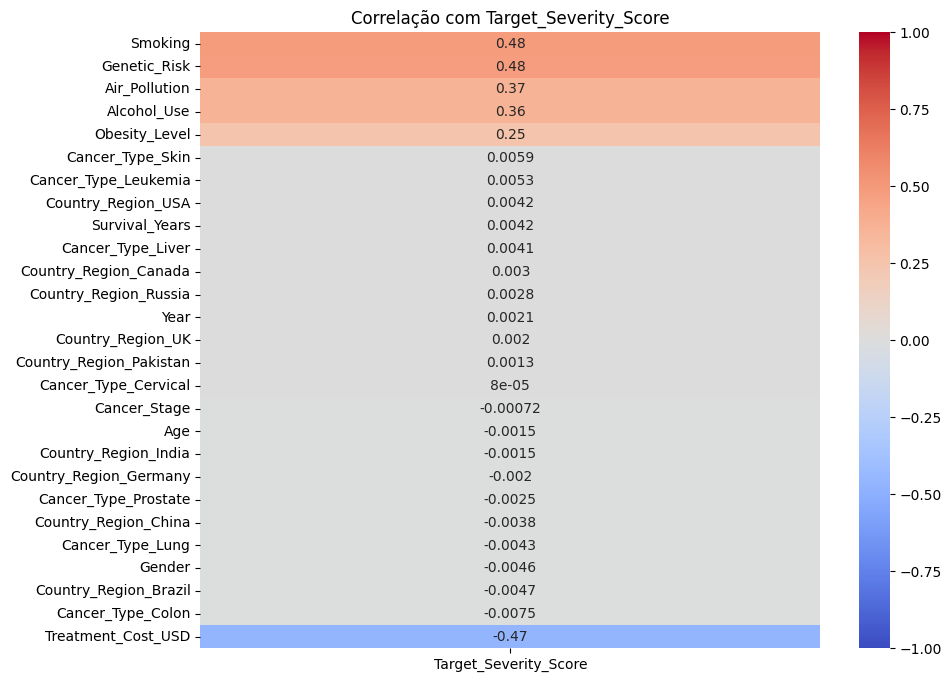

In [ ]:
# Plotando um gráfico para facilitar o entendimento
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlação com Target_Severity_Score")
plt.show()

In [19]:
# Para garantir que as colunas não possuam valores faltando.
missing_cols = [col for col in features if col not in df.columns]
print(missing_cols)


[]


In [20]:
# Dividindo nosso modelo em treino e teste em uma proporção 80/20. (80 Treino, 20 Teste)
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                    )

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


# Treinar modelos
# Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculando métricas
# Regressão Linear
train_r2_lr = r2_score(y_train, y_train_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_r2_lr = r2_score(y_test, y_test_pred_lr)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

# Ridge
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Lasso
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

In [30]:
# Exibir métricas
print("\n=== Regressão Linear ===")
print(f"R² (Treino): {train_r2_lr}")
print(f"RMSE (Treino): {train_rmse_lr}")
print(f"R² (Teste): {test_r2_lr}")
print(f"RMSE (Teste): {test_rmse_lr}")

print("\n=== Ridge ===")
print(f"R² (Treino): {train_r2_ridge}")
print(f"RMSE (Treino): {train_rmse_ridge}")
print(f"R² (Teste): {test_r2_ridge}")
print(f"RMSE (Teste): {test_rmse_ridge}")

print("\n=== Lasso ===")
print(f"R² (Treino): {train_r2_lasso}")
print(f"RMSE (Treino): {train_rmse_lasso}")
print(f"R² (Teste): {test_r2_lasso}")
print(f"RMSE (Teste): {test_rmse_lasso}")


=== Regressão Linear ===
R² (Treino): 0.9999942513244793
RMSE (Treino): 0.0028809068261109196
R² (Teste): 0.9999941381235521
RMSE (Teste): 0.0028859919480874233

=== Ridge ===
R² (Treino): 0.9999942513174728
RMSE (Treino): 0.002880908581736127
R² (Teste): 0.9999941381046793
RMSE (Teste): 0.002885996593931366

=== Lasso ===
R² (Treino): 0.9999530025337138
RMSE (Treino): 0.00823725550338709
R² (Teste): 0.9999522905397423
RMSE (Teste): 0.008233396614916146


In [31]:
# Aplicando outros modelos não lineares para testarmos ainda mais o modelo
from sklearn.tree import DecisionTreeRegressor         # Árvore de Regressão
from sklearn.ensemble import RandomForestRegressor    # Random Forest Regressor


In [32]:
# Árvore de Regressão (DecisionTreeRegressor)
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Importância das features (Decision Tree)
print("\n=== Importância das Features (Decision Tree) ===")
dt_importance = pd.DataFrame({'Feature': features, 'Importance': dt_model.feature_importances_})
print(dt_importance.sort_values('Importance', ascending=False))





=== Importância das Features (Decision Tree) ===
                    Feature  Importance
6                   Smoking    0.242917
3              Genetic_Risk    0.236913
9        Treatment_Cost_USD    0.218445
5               Alcohol_Use    0.126230
4             Air_Pollution    0.123432
7             Obesity_Level    0.052063
0                       Age    0.000000
17    Country_Region_Russia    0.000000
25     Cancer_Type_Prostate    0.000000
24         Cancer_Type_Lung    0.000000
23        Cancer_Type_Liver    0.000000
22     Cancer_Type_Leukemia    0.000000
21        Cancer_Type_Colon    0.000000
20     Cancer_Type_Cervical    0.000000
19       Country_Region_USA    0.000000
18        Country_Region_UK    0.000000
13     Country_Region_China    0.000000
16  Country_Region_Pakistan    0.000000
15     Country_Region_India    0.000000
14   Country_Region_Germany    0.000000
1                    Gender    0.000000
12    Country_Region_Canada    0.000000
11    Country_Region_Brazil   

In [34]:
from sklearn.metrics import mean_absolute_error



# Métricas para dados de TREINO
print("=== Métricas de Treino (Decision Tree) ===")
print(f"R²: {r2_score(y_train, y_train_pred_dt):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred_dt):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_dt)):.4f}")

# Métricas para dados de TESTE
print("\n=== Métricas de Teste (Decision Tree) ===")
print(f"R²: {r2_score(y_test, y_test_pred_dt):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred_dt):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_dt)):.4f}")

=== Métricas de Treino (Decision Tree) ===
R²: 0.9256
MAE: 0.2626
RMSE: 0.3278

=== Métricas de Teste (Decision Tree) ===
R²: 0.8867
MAE: 0.3223
RMSE: 0.4011


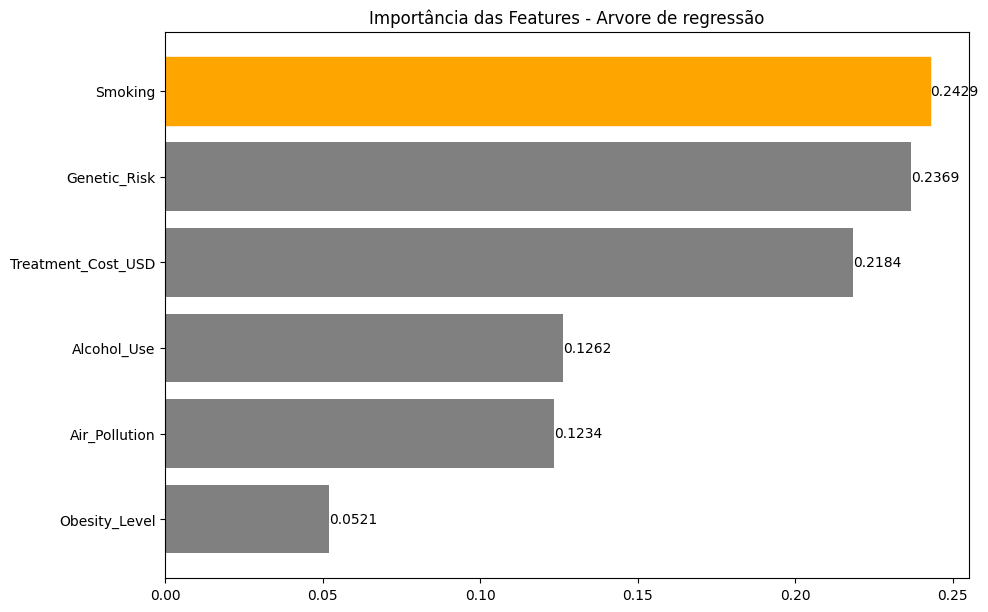

In [ ]:

import matplotlib.pyplot as plt

# Filtrando apenas as variáveis que impactam no modelo
features_selecionadas = ['Smoking', 'Genetic_Risk', 'Treatment_Cost_USD', 'Alcohol_Use', 'Air_Pollution', 'Obesity_Level']
dt_importance_filtrado = dt_importance[dt_importance['Feature'].isin(features_selecionadas)]

# Ordenar por importância (do maior para o menor)
dt_importance_filtrado = dt_importance_filtrado.sort_values('Importance', ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(dt_importance_filtrado['Feature'], dt_importance_filtrado['Importance'], color='#808080')

# Destacar a barra mais importante
bars[-1].set_color('orange')  # Laranja para a feature mais importante

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.title("Importância das Features - Arvore de regressão"),
plt.show()

In [ ]:

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Importância das features (Random Forest)
print("\n=== Importância das Features (Random Forest) ===")
rf_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
print(rf_importance.sort_values('Importance', ascending=False))


=== Importância das Features (Random Forest) ===
                    Feature    Importance
6                   Smoking  2.414860e-01
3              Genetic_Risk  2.356203e-01
9        Treatment_Cost_USD  2.183069e-01
5               Alcohol_Use  1.269698e-01
4             Air_Pollution  1.248355e-01
7             Obesity_Level  5.243617e-02
10           Survival_Years  9.733645e-05
0                       Age  9.588919e-05
2                      Year  5.481774e-05
8              Cancer_Stage  3.901160e-05
1                    Gender  2.148640e-05
26         Cancer_Type_Skin  4.113529e-06
24         Cancer_Type_Lung  3.698875e-06
12    Country_Region_Canada  3.471470e-06
18        Country_Region_UK  2.844351e-06
21        Cancer_Type_Colon  2.760872e-06
25     Cancer_Type_Prostate  2.624983e-06
20     Cancer_Type_Cervical  2.512485e-06
23        Cancer_Type_Liver  2.499738e-06
13     Country_Region_China  2.405041e-06
16  Country_Region_Pakistan  1.922234e-06
11    Country_Region_Brazi

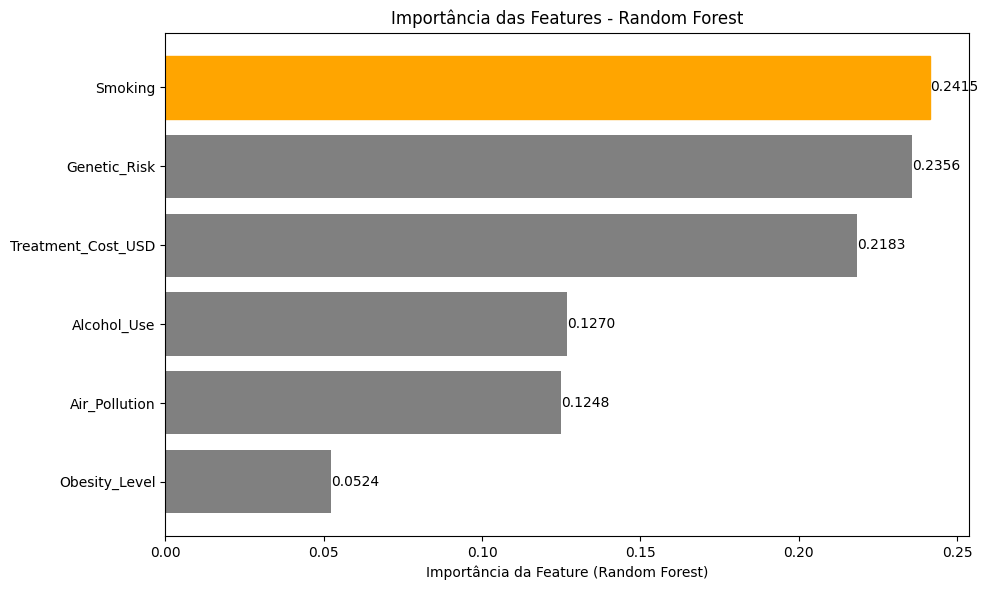

In [ ]:
import matplotlib.pyplot as plt

# Filtrando apenas as variáveis que impactam no modelo
features_selecionadas = ['Smoking', 'Genetic_Risk', 'Treatment_Cost_USD', 'Alcohol_Use', 'Air_Pollution', 'Obesity_Level']
rf_importance_filtrado = rf_importance[rf_importance['Feature'].isin(features_selecionadas)]

# Ordenar por importância (do maior para o menor)
rf_importance_filtrado = rf_importance_filtrado.sort_values('Importance', ascending=True)

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(rf_importance_filtrado['Feature'], rf_importance_filtrado['Importance'], color="#808080")


# Destacar a barra mais importante
bars[-1].set_color("orange")  # Laranja para a feature mais importante

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', ha='left', fontsize=10)

plt.xlabel('Importância da Feature (Random Forest)')  # Atualizado para RF
plt.title('Importância das Features - Random Forest')  # Título atualizado
plt.tight_layout()
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Métricas para dados de TREINO
print("=== Métricas de Treino ===")
print(f"R²: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.4f}")

# Métricas para dados de TESTEx
print("\n=== Métricas de Teste ===")
print(f"R²: {r2_score(y_test, y_test_pred_rf):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.4f}")

=== Métricas de Treino ===
R²: 0.9701
MAE: 0.1653
RMSE: 0.2077

=== Métricas de Teste ===
R²: 0.9550
MAE: 0.2022
RMSE: 0.2530


In [62]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Inicialização do modelo
xgb_model = XGBRegressor(
    n_estimators=150,  # Número de árvores
    max_depth=6,       # Profundidade máxima
    learning_rate=0.1, # Taxa de aprendizado
    random_state=42  # Garantindo que valores aleatórios sejam reproduziveis
)

# Treinamento
xgb_model.fit(X_train, y_train)

# Previsões
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [160]:
# Importância das features (XGBoost)
print("\n=== Importância das Features (XGBoost) ===")
xgb_importance = pd.DataFrame({'Feature': features, 'Importance': xgb_model.feature_importances_})
print(xgb_importance.sort_values('Importance', ascending=False))


=== Importância das Features (XGBoost) ===
                    Feature  Importance
6                   Smoking    0.244009
3              Genetic_Risk    0.218021
9        Treatment_Cost_USD    0.214996
5               Alcohol_Use    0.134891
4             Air_Pollution    0.127111
7             Obesity_Level    0.059047
25     Cancer_Type_Prostate    0.000183
18        Country_Region_UK    0.000106
13     Country_Region_China    0.000101
19       Country_Region_USA    0.000100
10           Survival_Years    0.000098
17    Country_Region_Russia    0.000097
8              Cancer_Stage    0.000095
14   Country_Region_Germany    0.000094
21        Cancer_Type_Colon    0.000094
23        Cancer_Type_Liver    0.000094
26         Cancer_Type_Skin    0.000093
12    Country_Region_Canada    0.000088
24         Cancer_Type_Lung    0.000085
15     Country_Region_India    0.000080
11    Country_Region_Brazil    0.000079
0                       Age    0.000079
2                      Year    0.000

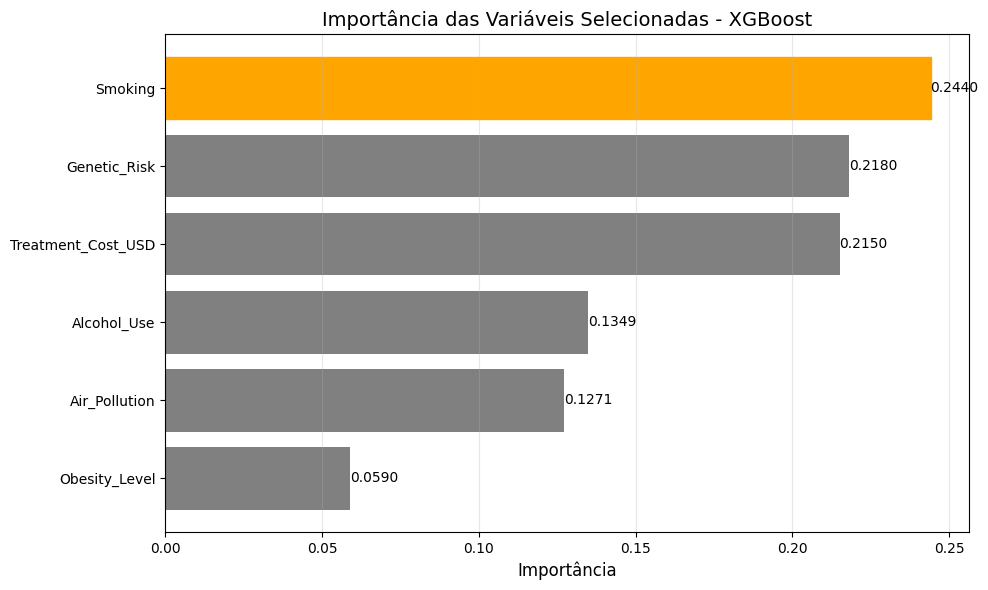

In [192]:
import matplotlib.pyplot as plt

# 1. Extrair importância do XGBoost
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
})

# 2. Filtrar apenas as variáveis selecionadas (mesmas da Decision Tree)
features_selecionadas = ['Smoking', 'Genetic_Risk', 'Treatment_Cost_USD', 
                         'Alcohol_Use', 'Air_Pollution', 'Obesity_Level']
xgb_importance_filtrado = xgb_importance[xgb_importance['Feature'].isin(features_selecionadas)]

# 3. Ordenar por importância (ascendente para melhor visualização)
xgb_importance_filtrado = xgb_importance_filtrado.sort_values('Importance', ascending=True)

# Plotar gráfico
plt.figure(figsize=(10, 6))

# Criar as barras e armazenar o objeto Bars
bars = plt.barh(xgb_importance_filtrado['Feature'], 
               xgb_importance_filtrado['Importance'], 
               color='#808080')  # Todas as barras cinza

# Destacar a barra mais importante (última, pois está ordenada como ascending=True)
bars[-1].set_color('orange') 


# Configurações do gráfico
plt.xlabel('Importância', fontsize=12)
plt.title('Importância das Variáveis Selecionadas - XGBoost', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', 
             va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()



In [66]:
# Métricas para dados de TREINO
print("\n=== XGBOOST ===")
print("\nMétricas de Treino")
print(f"R²: {r2_score(y_train, y_train_pred_xgb):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)):.4f}")



# Métricas para dados de TESTE
print("\nMétricas de Teste")
print(f"R²: {r2_score(y_test, y_test_pred_xgb):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)):.4f}")



=== XGBOOST ===

Métricas de Treino
R²: 0.9969
MAE: 0.0532
RMSE: 0.0674

Métricas de Teste
R²: 0.9953
MAE: 0.0654
RMSE: 0.0820


In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Criar DataFrame com as importâncias
comparacao = pd.DataFrame({
    'Feature': X_train.columns,
    'DecisionTree': dt_model.feature_importances_,
    'RandomForest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
})

Removendo features que não são importantes

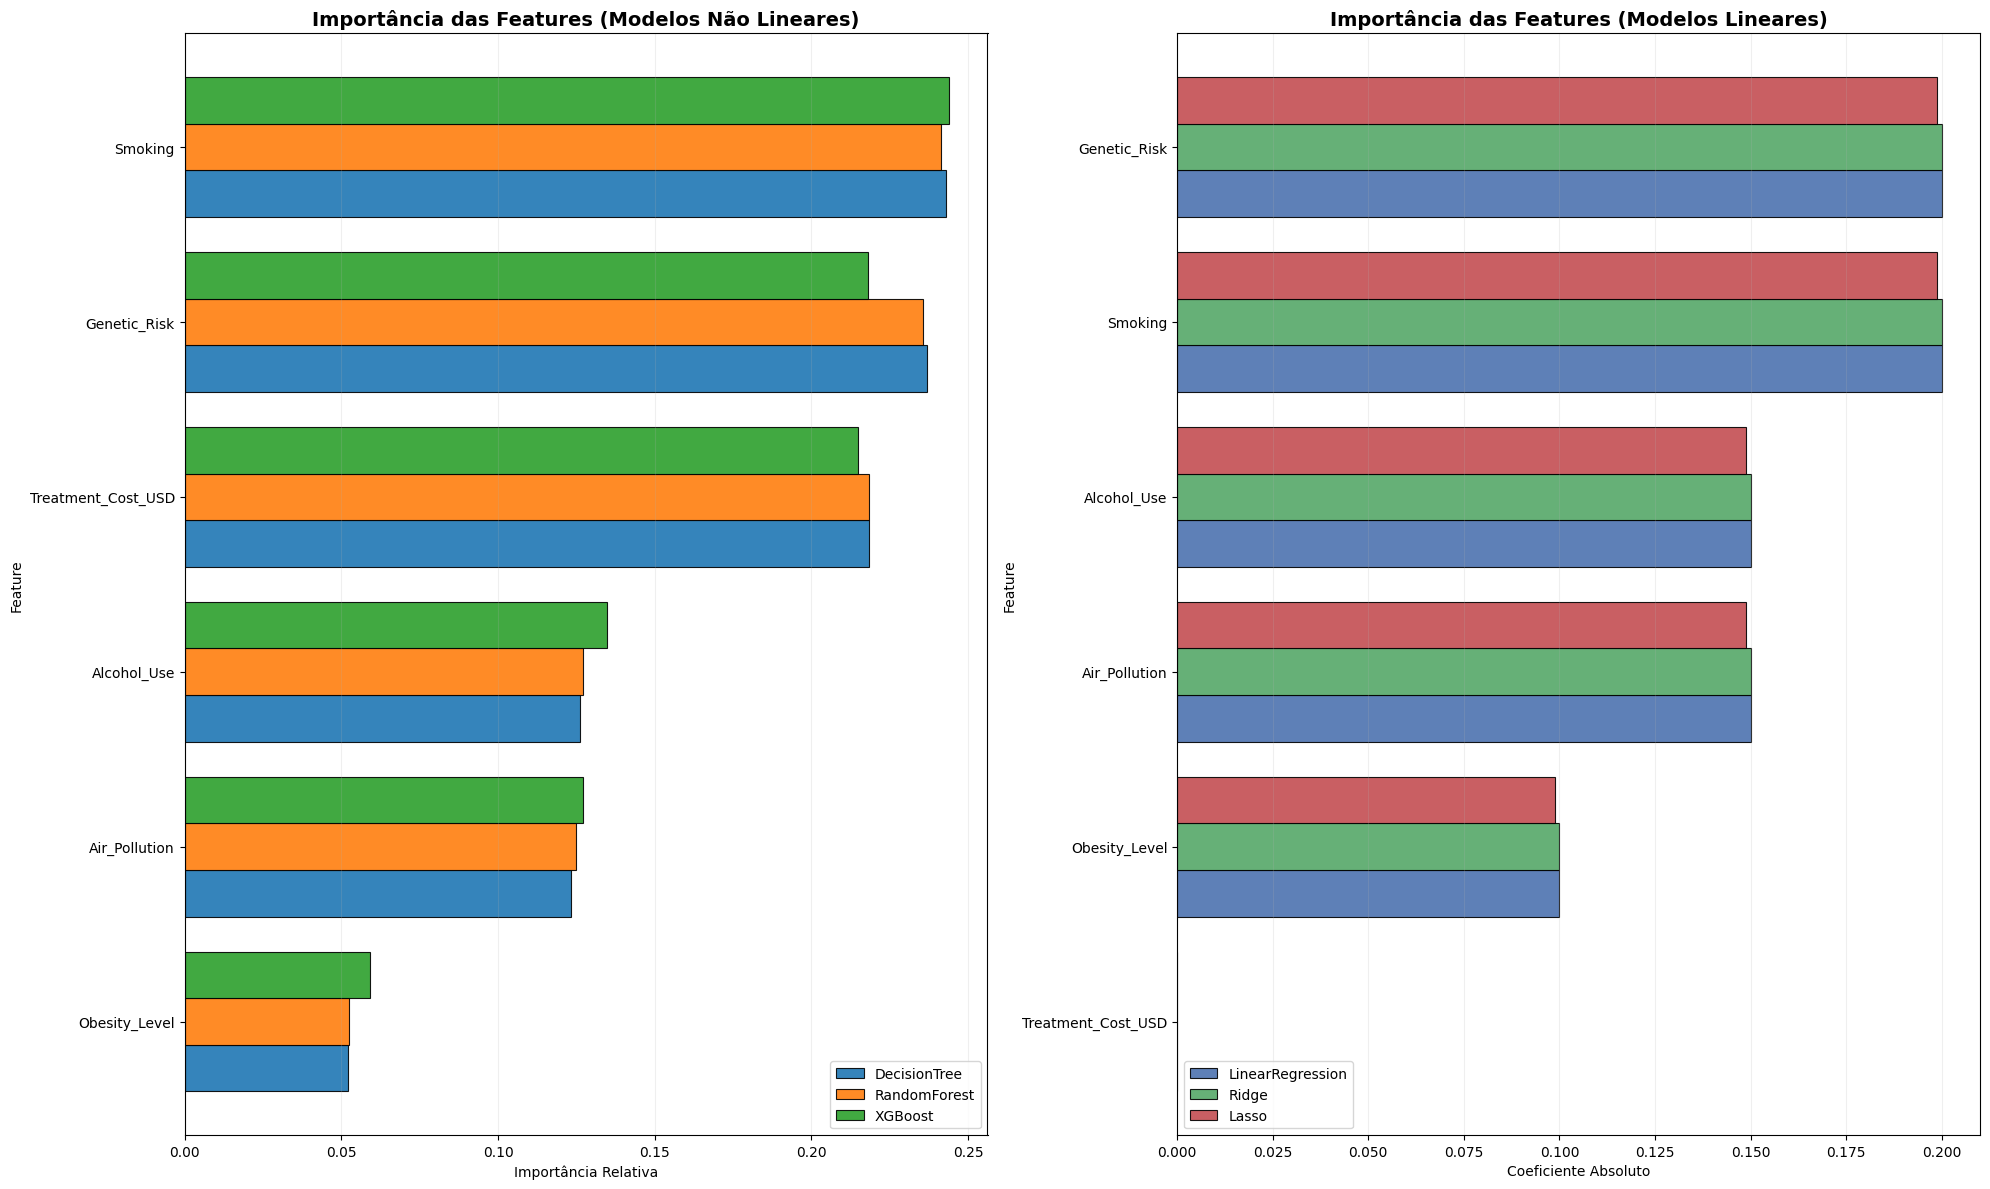

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr = lr_model
ridge = ridge_model
lasso = lasso_model


# Importancia dos Modelos não Lineares
# Pegando os coeficientes absolutos e criando DataFrame
comparacao = pd.DataFrame({
    'Feature': X_train.columns,
    'DecisionTree': dt_model.feature_importances_,
    'RandomForest': rf_model.feature_importances_,
    'XGBoost': xgb_model.feature_importances_
})

# 2 — Importância dos Modelos Lineares
# Pegando os coeficientes absolutos e criando DataFrame
comparacao_linear = pd.DataFrame({
    'Feature': X_train.columns,
    'LinearRegression': np.abs(lr.coef_),
    'Ridge': np.abs(ridge.coef_),
    'Lasso': np.abs(lasso.coef_)
})


# 2. Filtrar features com importância > 0.01 nos modelos não lineares
mask = (comparacao[['DecisionTree', 'RandomForest', 'XGBoost']] > 0.01).any(axis=1)
features_relevantes = comparacao[mask].sort_values('DecisionTree', ascending=True)

# Filtrar features com importância > 0.01 nos modelos lineares
mask_linear = (comparacao_linear[['LinearRegression', 'Ridge', 'Lasso']] > 0.01).any(axis=1)
if 'Treatment_Cost_USD' not in features_relevantes_linear['Feature'].values: ##
    treatment_row = comparacao_linear[comparacao_linear['Feature'] == 'Treatment_Cost_USD'] ##
    features_relevantes_linear = pd.concat([features_relevantes_linear, treatment_row]).sort_values('Ridge', ascending=True)
    # features_relevantes_linear = comparacao_linear[mask_linear].sort_values('Lasso', ascending=True)




# Plotando os gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=False)

# Normalizando as importâncias para evitar estouro
comparacao.iloc[:, 1:] = comparacao.iloc[:, 1:].div(comparacao.iloc[:, 1:].sum(axis=0), axis=1)


# 3. Configurações do gráfico
ax = features_relevantes.plot.barh(
    x='Feature',
    ax=axes[0],
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Cores: Azul, Laranja, Verde
    width=0.8,
    edgecolor='black',
    linewidth=0.8,
    alpha=0.9
)

# 4. Customização 
axes[0].set_title('Importância das Features (Modelos Não Lineares)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importância Relativa')
axes[0].grid(axis='x', alpha=0.2)


# Gráfico Linear
features_relevantes_linear.plot.barh(
    x='Feature',
    ax=axes[1],
    color=['#4c72b0', '#55a868', '#c44e52'],
    width=0.8,
    edgecolor='black',
    linewidth=0.8,
    alpha=0.9
)
# Customização
axes[1].set_title('Importância das Features (Modelos Lineares)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Coeficiente Absoluto')
axes[1].grid(axis='x', alpha=0.2)


plt.tight_layout()
plt.show()


# Foi colocado a variavel #Treament_Cost_USD no modelo linear, só pra efeito de comparação em relação aos modelos não lineares. (Treatment_Cost_USD não possui impacto nenhum em modelos lineares)

Comparando resultados.

In [193]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Supondo que você já tem as previsões para todos os modelos
# Se não tiver, adicione: y_test_pred_lr = lr_model.predict(X_test), etc.
# Exemplo de placeholders para as previsões (substitua pelos seus dados reais)
# y_test_pred_lr = lr_model.predict(X_test)
# y_test_pred_ridge = ridge_model.predict(X_test)
# y_test_pred_lasso = lasso_model.predict(X_test)

# Calcular métricas para todos os modelos
metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'LinearRegression', 'Ridge', 'Lasso'],
    'R²': [
        r2_score(y_test, y_test_pred_dt),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_xgb),
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_ridge),
        r2_score(y_test, y_test_pred_lasso)
    ],
    'MAE': [
        mean_absolute_error(y_test, y_test_pred_dt),
        mean_absolute_error(y_test, y_test_pred_rf),
        mean_absolute_error(y_test, y_test_pred_xgb),
        mean_absolute_error(y_test, y_test_pred_lr),
        mean_absolute_error(y_test, y_test_pred_ridge),
        mean_absolute_error(y_test, y_test_pred_lasso)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
    ]
}

# Criar DataFrame com as métricas
metrics_df = pd.DataFrame(metrics)

# Exibir tabela formatada
print("\n=== Comparação dos Modelos ===")
print(metrics_df.to_string(index=False, formatters={
    'R² Teste': '{:.4f}'.format,
    'MAE Teste': '{:.4f}'.format,
    'RMSE Teste': '{:.4f}'.format
}))


=== Comparação dos Modelos ===
           Model       R²      MAE     RMSE
   Decision Tree 0.886747 0.322330 0.401145
   Random Forest 0.954968 0.202192 0.252951
         XGBoost 0.995268 0.065404 0.082000
LinearRegression 0.999994 0.002496 0.002886
           Ridge 0.999994 0.002496 0.002886
           Lasso 0.999952 0.006624 0.008233


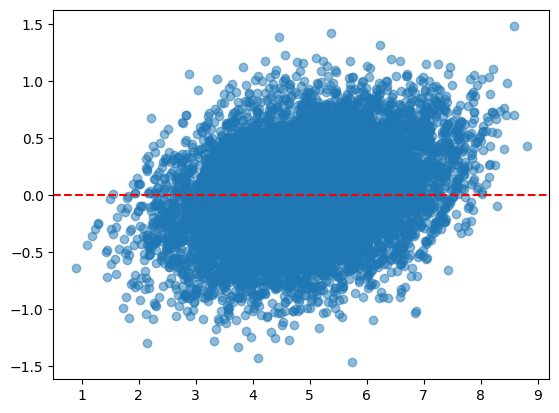

In [197]:
plt.scatter(y_test, y_test - y_test_pred_dt, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')